In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Visualise predictions

In [2]:
participant = 10

predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')

Text(0.5, 1.0, 'correlation: 0.22722634358995034')

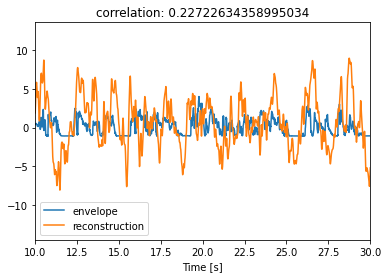

In [3]:
fs = 125
t = np.arange(len(predictions))/fs
plt.plot(t, ground_truth, label='envelope')
plt.plot(t, predictions, label='reconstruction')
plt.legend()

plt.xlim(10, 30)
plt.xlabel('Time [s]')

plt.title(f'correlation: {pearsonr(ground_truth, predictions)[0]}')

In [6]:
correlations = []
for participant in range(13):
    predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
    correlations.append(pearsonr(ground_truth, predictions)[0])

Text(0.5, 0, 'participant')

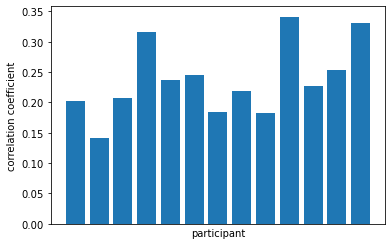

In [9]:
plt.bar(range(13),correlations)
plt.xticks([])
plt.ylabel('correlation coefficient')
plt.xlabel('participant')

# Divide data into windows

In [10]:
def get_scores(y, y_hat, batch_size=250, null=False):

    batches = y.size//batch_size - 1
    scores = []

    idxs = np.arange(batches)
    if null:
        idxs = np.random.choice(idxs, idxs.size, replace=False)

    for i in range(batches):
        scores.append(pearsonr(y[idxs[i]*batch_size:(idxs[i]+1)*batch_size], y_hat[i*batch_size:(i+1)*batch_size])[0])
    return np.array(scores)

In [11]:
participant = 10

predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')

scores = get_scores(ground_truth, predictions, batch_size=1250)
null_scores = get_scores(ground_truth, predictions, batch_size=1250, null = True)

In [14]:
print('scores:', scores.mean(), scores.std())
print('null scores:', null_scores.mean(), null_scores.std())

scores: 0.22638022915836287 0.14642719770446216
null scores: 0.03163258968196882 0.1310781808590377


# How do the mean and standard deviation vary with window size?

In [18]:
means = np.empty((4, 13))
null_means = np.empty((4, 13))
stds = np.empty((4, 13))
null_stds = np.empty((4, 13))

for i, window in enumerate([125, 250, 625, 1250]):
    for j in range(13):

        predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{j:02d}.npy')
        ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')

        scores = get_scores(ground_truth, predictions, batch_size=window)
        null_scores = get_scores(ground_truth, predictions, batch_size=window, null = True)
        
        means[i, j] = scores.mean()
        stds[i, j] = scores.std()
        null_means[i, j] = null_scores.mean()
        null_stds[i, j] = null_scores.std()

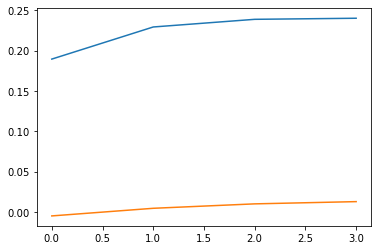

In [26]:
plt.plot(means.mean(axis=1))
plt.plot(null_means.mean(axis=1))
#plt.xscale('log')

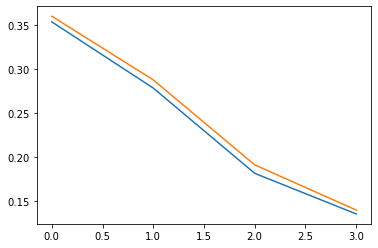

In [28]:
plt.plot(stds.mean(axis=1))
plt.plot(null_stds.mean(axis=1))

# Recreate subject-level plot from figure